In [1]:
import numpy as np
import pandas as pd
from docutils.nodes import title

In [2]:
ds = pd.read_csv('./datasets/properati_argentina_2021.csv')
houses = ds.copy()
houses.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


In [4]:
houses.shape

(460154, 20)

In [5]:
houses.describe()

,latitud,longitud,place_l6,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,419740.000000,419740.000000,0.0,368498.000000,344113.000000,397813.000000,4.279160e+05,4.421530e+05
mean,-34.228570,-59.557066,NaN,3.278053,2.297960,420.601250,9.605005e+03,3.063273e+05
std,3.251509,2.905129,NaN,1.870832,1.673985,4026.380748,3.440367e+06,4.899613e+06
min,-54.832057,-103.219258,NaN,1.000000,-3.000000,-1.000000,-3.000000e+00,0.000000e+00
25%,-34.640132,-58.899343,NaN,2.000000,1.000000,50.000000,4.500000e+01,4.490000e+04
50%,-34.585122,-58.488309,NaN,3.000000,2.000000,90.000000,7.800000e+01,9.800000e+04
75%,-34.423414,-58.404876,NaN,4.000000,3.000000,210.000000,1.700000e+02,1.990000e+05
max,42.557773,-35.044991,NaN,40.000000,390.000000,200000.000000,2.147484e+09,1.500000e+09


In [6]:
filas_totales = houses.shape[0]
print(houses.isna().sum() / filas_totales * 100)

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       8.782712
longitud                      8.782712
place_l2                      0.000000
place_l3                      4.887277
place_l4                     69.788375
place_l5                     99.471916
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms               19.918549
property_bedrooms            25.217862
property_surface_total       13.547856
property_surface_covered      7.005915
property_price                3.911951
property_currency             4.034302
property_title                0.000000
dtype: float64


<AxesSubplot:>

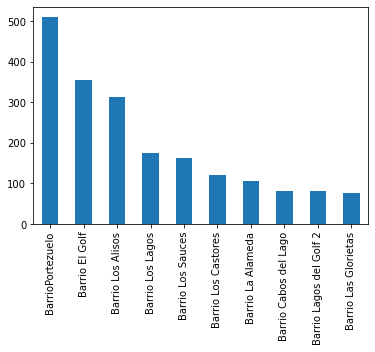

In [19]:
# top 10 barrios
houses.place_l5.value_counts().head(10).plot.bar()

<AxesSubplot:>

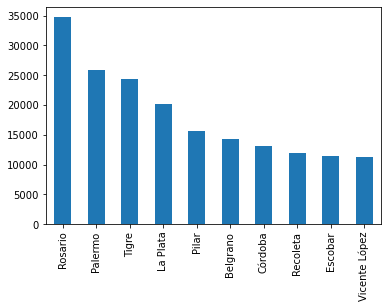

In [13]:
# top 10 ciudades
houses.place_l3.value_counts().head(10).plot.bar()

<AxesSubplot:>

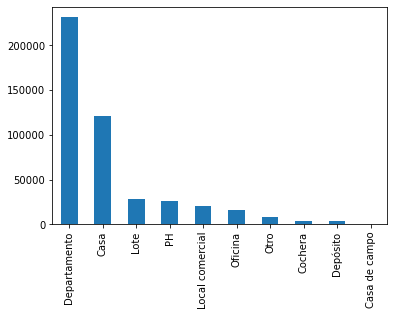

In [10]:
houses['property_type'].value_counts().plot.bar()

In [26]:
houses[houses.property_price.isna()].shape
# 18 mil casas sin precio

(18001, 20)

Hay 18 mil casas sin precio, representan un 3% de los datos, como queremos precedir el precio estas filas no nos sirven.

In [27]:
houses.dropna(subset=['property_price'], inplace=True)

In [28]:
# Verifico que haya bajado el porcentaje
filas_totales = houses.shape[0]
print(houses.isna().sum() / filas_totales * 100)

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       8.836986
longitud                      8.836986
place_l2                      0.000000
place_l3                      4.762379
place_l4                     69.351333
place_l5                     99.462629
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms               19.258040
property_bedrooms            24.853840
property_surface_total       13.405088
property_surface_covered      6.936513
property_price                0.000000
property_currency             0.127331
property_title                0.000000
dtype: float64


In [29]:
houses[houses.property_price.isna()].shape
# 18 mil casas sin precio

(0, 20)

In [37]:
houses[houses.property_price == 0].shape

(563, 20)

Además hay 563 filas con el precio en 0, vamos a borrarlas por el mismo motivo.

In [38]:
houses.drop(houses[houses.property_price == 0].index, inplace=True)
houses[houses.property_price == 0].shape

(0, 20)

In [42]:
houses.start_date = pd.to_datetime(houses.start_date)
houses.end_date = pd.to_datetime(houses.end_date)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441590 entries, 1 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        441590 non-null  object 
 1   start_date                441590 non-null  object 
 2   end_date                  441590 non-null  object 
 3   created_on                441590 non-null  object 
 4   latitud                   402542 non-null  float64
 5   longitud                  402542 non-null  float64
 6   place_l2                  441590 non-null  object 
 7   place_l3                  420549 non-null  object 
 8   place_l4                  135359 non-null  object 
 9   place_l5                  2374 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 441590 non-null  object 
 12  property_type             441590 non-null  object 
 13  property_rooms            356585 non-null  f

<AxesSubplot:title={'center':'Promedio de precio por tipo de propiedad'}, xlabel='property_type'>

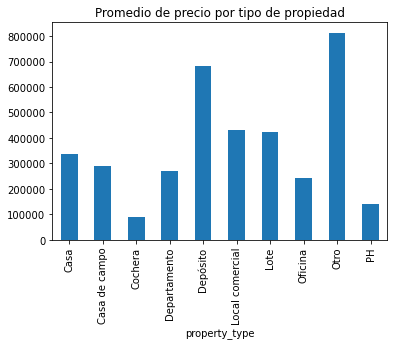

In [54]:
houses.groupby('property_type')['property_price'].mean().plot.bar(title='Promedio de precio por tipo de propiedad')